<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%207/Autoencoder_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# 1. Load dataset MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 58.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.12MB/s]


In [3]:
# 2. Definisikan model Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [4]:
# 3. Training loop
epochs = 10
for epoch in range(epochs):
    for data, _ in trainloader:
        img = data.view(data.size(0), -1)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.0578
Epoch [2/10], Loss: 0.0558
Epoch [3/10], Loss: 0.0474
Epoch [4/10], Loss: 0.0432
Epoch [5/10], Loss: 0.0387
Epoch [6/10], Loss: 0.0380
Epoch [7/10], Loss: 0.0399
Epoch [8/10], Loss: 0.0381
Epoch [9/10], Loss: 0.0377
Epoch [10/10], Loss: 0.0420


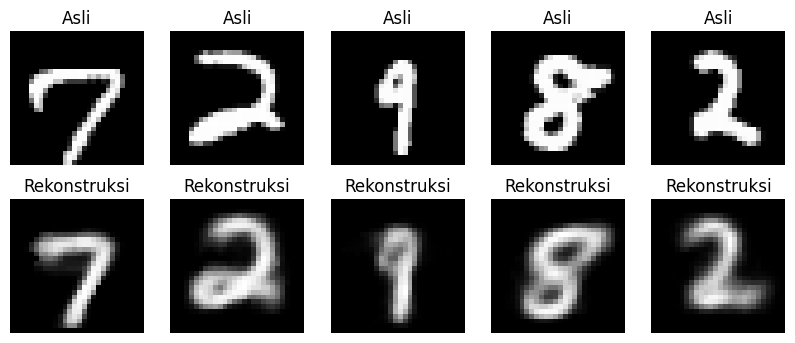

In [5]:
# 4. Visualisasi hasil rekonstruksi
with torch.no_grad():
    sample = next(iter(trainloader))[0][:5].view(-1, 28*28)
    reconstructed = model(sample)

    sample = sample.view(-1, 1, 28, 28)
    reconstructed = reconstructed.view(-1, 1, 28, 28)

    fig, axes = plt.subplots(2, 5, figsize=(10,4))
    for i in range(5):
        axes[0, i].imshow(sample[i].squeeze(), cmap='gray')
        axes[0, i].set_title("Asli")
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
        axes[1, i].set_title("Rekonstruksi")
        axes[1, i].axis('off')
    plt.show()


In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 2) # Changed from 3 to 2
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 12), # Changed from 3 to 2
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [7]:
epochs = 10
print(f"Starting retraining for {epochs} epochs...")
for epoch in range(epochs):
    for data, _ in trainloader:
        img = data.view(data.size(0), -1)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Starting retraining for 10 epochs...
Epoch [1/10], Loss: 0.0547
Epoch [2/10], Loss: 0.0465
Epoch [3/10], Loss: 0.0471
Epoch [4/10], Loss: 0.0409
Epoch [5/10], Loss: 0.0457
Epoch [6/10], Loss: 0.0413
Epoch [7/10], Loss: 0.0419
Epoch [8/10], Loss: 0.0432
Epoch [9/10], Loss: 0.0393
Epoch [10/10], Loss: 0.0382


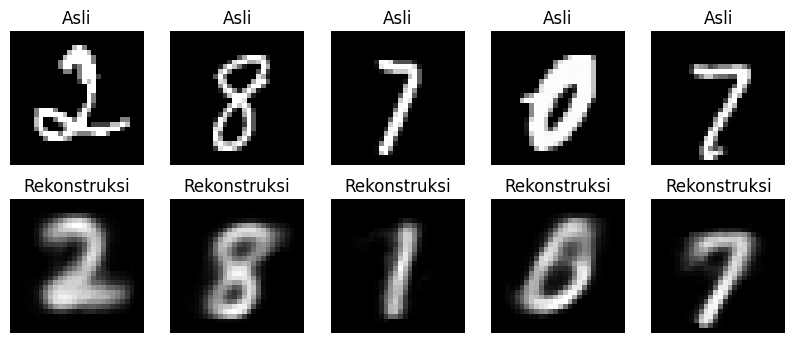

In [8]:
# 4. Visualisasi hasil rekonstruksi
with torch.no_grad():
    sample = next(iter(trainloader))[0][:5].view(-1, 28*28)
    reconstructed = model(sample)

    sample = sample.view(-1, 1, 28, 28)
    reconstructed = reconstructed.view(-1, 1, 28, 28)

    fig, axes = plt.subplots(2, 5, figsize=(10,4))
    for i in range(5):
        axes[0, i].imshow(sample[i].squeeze(), cmap='gray')
        axes[0, i].set_title("Asli")
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
        axes[1, i].set_title("Rekonstruksi")
        axes[1, i].axis('off')
    plt.show()

## Add Gaussian Noise Function



In [13]:
def add_gaussian_noise(image_tensor, noise_factor):
    noise = torch.randn_like(image_tensor) * noise_factor
    noisy_image = image_tensor + noise
    return torch.clamp(noisy_image, 0., 1.)

print("Gaussian noise function defined.")

Gaussian noise function defined.


In [14]:
epochs = 10
noise_factor = 0.5 # Define noise factor
print(f"Starting retraining for {epochs} epochs with denoising...")
for epoch in range(epochs):
    for data, _ in trainloader:
        img = data.view(data.size(0), -1)

        noisy_img = add_gaussian_noise(img, noise_factor) # Add Gaussian noise

        output = model(noisy_img) # Input noisy images to the model
        loss = criterion(output, img) # Calculate loss against clean images

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Starting retraining for 10 epochs with denoising...
Epoch [1/10], Loss: 0.0418
Epoch [2/10], Loss: 0.0417
Epoch [3/10], Loss: 0.0427
Epoch [4/10], Loss: 0.0424
Epoch [5/10], Loss: 0.0406
Epoch [6/10], Loss: 0.0393
Epoch [7/10], Loss: 0.0424
Epoch [8/10], Loss: 0.0392
Epoch [9/10], Loss: 0.0411
Epoch [10/10], Loss: 0.0435


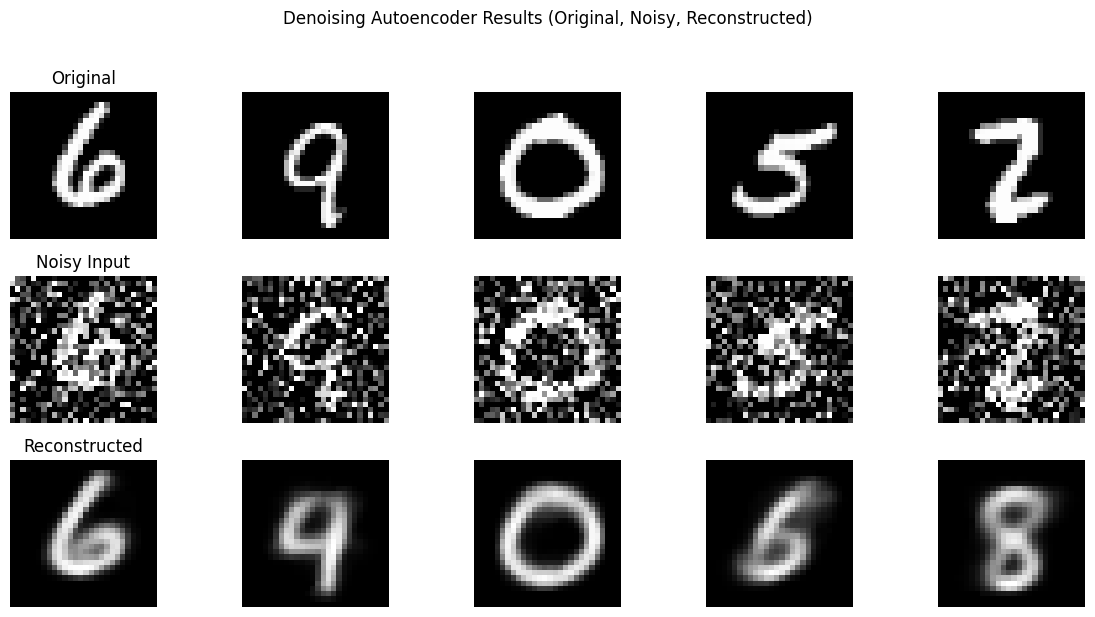

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [15]:
model.eval()
with torch.no_grad():
    # Get a batch of original images
    data, _ = next(iter(trainloader))
    sample_count = 5 # Number of samples to visualize
    original_images = data[:sample_count].view(sample_count, -1)

    # Generate noisy versions
    noisy_images = add_gaussian_noise(original_images, noise_factor)

    # Get reconstructed images from the model
    reconstructed_images = model(noisy_images)

    # Reshape images back to 2D for visualization
    original_images_2d = original_images.view(-1, 1, 28, 28)
    noisy_images_2d = noisy_images.view(-1, 1, 28, 28)
    reconstructed_images_2d = reconstructed_images.view(-1, 1, 28, 28)

    # Create a figure with subplots (3 rows: Original, Noisy, Reconstructed)
    fig, axes = plt.subplots(3, sample_count, figsize=(12, 6))

    for i in range(sample_count):
        # Original Image
        axes[0, i].imshow(original_images_2d[i].squeeze(), cmap='gray')
        if i == 0: # Add title only to the first column for clarity
            axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        # Noisy Image
        axes[1, i].imshow(noisy_images_2d[i].squeeze(), cmap='gray')
        if i == 0:
            axes[1, i].set_title("Noisy Input")
        axes[1, i].axis('off')

        # Reconstructed Image
        axes[2, i].imshow(reconstructed_images_2d[i].squeeze(), cmap='gray')
        if i == 0:
            axes[2, i].set_title("Reconstructed")
        axes[2, i].axis('off')

    plt.suptitle('Denoising Autoencoder Results (Original, Noisy, Reconstructed)', y=1.02)
    plt.tight_layout()
    plt.show()

model.train() # Set model back to training mode